In [11]:
from utils import CLOVA
from utils import contents_select
from utils import Frontalize
from utils import Lip_motion
from utils import Pronounce
from utils import visualize
from utils import Wave

import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

## Analysis inference

In [3]:
# CLOVA.ClovaSpeechClient().req_upload('./data/system_video.mp4',completion='sync')

In [3]:
filepath = './data/'
videoname = 'system_video'
lst, dialogue = contents_select.contents_select(filepath, videoname, exist=True)
print('학습 가능 영상:', lst)
print('대본:', dialogue)

학습 가능 영상: [0, 4, 6]
대본: [{'start_time': '00:00:00.000', 'speaker_id': '이승준', 'end_time': '00:00:03.304', 'dialogue_id': 1469, 'utterance': '아까 깜빡한게 있는데요 이영애씨'}, {'start_time': '00:00:03.304', 'speaker_id': '이영애', 'end_time': '00:00:04.021', 'dialogue_id': 1468, 'utterance': '뭘요?'}, {'start_time': '00:00:04.021', 'speaker_id': '이승준', 'end_time': '00:00:07.443', 'dialogue_id': 1467, 'utterance': '나 중국에 있는 동안 돈 보냈더라구요? '}, {'start_time': '00:00:08.296', 'speaker_id': '이영애', 'end_time': '00:00:09.606', 'dialogue_id': 1466, 'utterance': '아 네'}, {'start_time': '00:00:10.252', 'speaker_id': '이승준', 'end_time': '00:00:15.878', 'dialogue_id': 1465, 'utterance': '근데 마장동에서 곱창 먹고 집에 갈때 택시비 빌려간거 만사천팔백원은 안보냈던데?'}, {'start_time': '00:00:17.330', 'speaker_id': '이영애', 'end_time': '00:00:17.925', 'dialogue_id': 1464, 'utterance': '네?'}, {'start_time': '00:00:18.016', 'speaker_id': '이승준', 'end_time': '00:00:21.663', 'dialogue_id': 1463, 'utterance': '계산 정확하게 하자면서 그건 왜 빼먹어요?'}, {'start_time': '00:00:22.547

In [7]:
# filepath = './data/'
# videoname = 'new_video'
# lst, object = contents_select.contents_select(filepath, videoname, exist=False)
# print('학습 가능 영상:', lst)
# print('대본:', object)

In [4]:
lets_study, lets_study_lip_lst = contents_select.create_study_dir(videoname, lst, dialogue=dialogue, object=None, exist=True)
print('최종 학습 가능 목록:', lets_study)
print('학습 가능 영상 입술 좌표:', lets_study_lip_lst)

Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
0번째 영상 확인을 시작합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
4번째 영상 확인을 시작합니다.
4번 영상은 Let's study 학습 자료로 활용 가능합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
6번째 영상 확인을 시작합니다.
6번 영상은 Let's study 학습 자료로 활용 가능합니다.
영상 확인 완료: [4, 6] 학습 가능
최종 학습 가능 목록: [4, 6]
학습 가능 영상 입술 좌표: [[[(568, 429), (586, 422), (600, 416), (612, 419), (622, 415), (633, 418), (647, 423), (634, 434), (623, 440), (612, 443), (600, 442), (587, 438), (577, 428), (601, 425), (612, 426), (623, 424), (640, 424), (622, 425), (612, 427), (600, 426)], [(568, 429), (587, 422), (600, 416), (612, 420), (623, 415), (633, 418), (647, 424), (634, 434), (624, 440), (613, 443), (600, 442), (587, 438), (577, 429), (601, 425), (613, 427), (623, 424

In [5]:
lets_study = [4, 6]

In [6]:
target_name = 'user_video'
# video_index = int(input('Select Directory want to study in lets_stduy lst'))
video_index = 0
selected_dir = f'./data/Study_Dir/{lets_study[video_index]}th_Study_Dir'

In [7]:
# 계산 정~확하게 하자면서, 그건 왜 빼먹어요

In [38]:
Lip_motion.make_target_dir(target_name, selected_dir)

Directory is already existed


In [7]:
dir_lst = lets_study
target_dir = './data/test'
l_score, l_lst = Lip_motion.lip_motion_analysis(video_index, target_dir, dir_lst)

Directory is already existed
Frames are already existed
원본 영상과 학습자 영상의 프레임 수가 일치합니다.
입술 분석 결과: 14.212619335881115


In [8]:
l_score

14.212619335881115

In [9]:
filepath = './data/'
videoname_2 = 'user_video'
Wave.make_wave_file('4th_video', './data/Study_Dir/4th_Study_Dir/')
Wave.make_wave_file(videoname=videoname_2, directory=filepath)

Directory is already existed
Directory is already existed


exporting ./data/Audio/out_audio_system.wav
exporting ./data/Audio/out_audio_user.wav


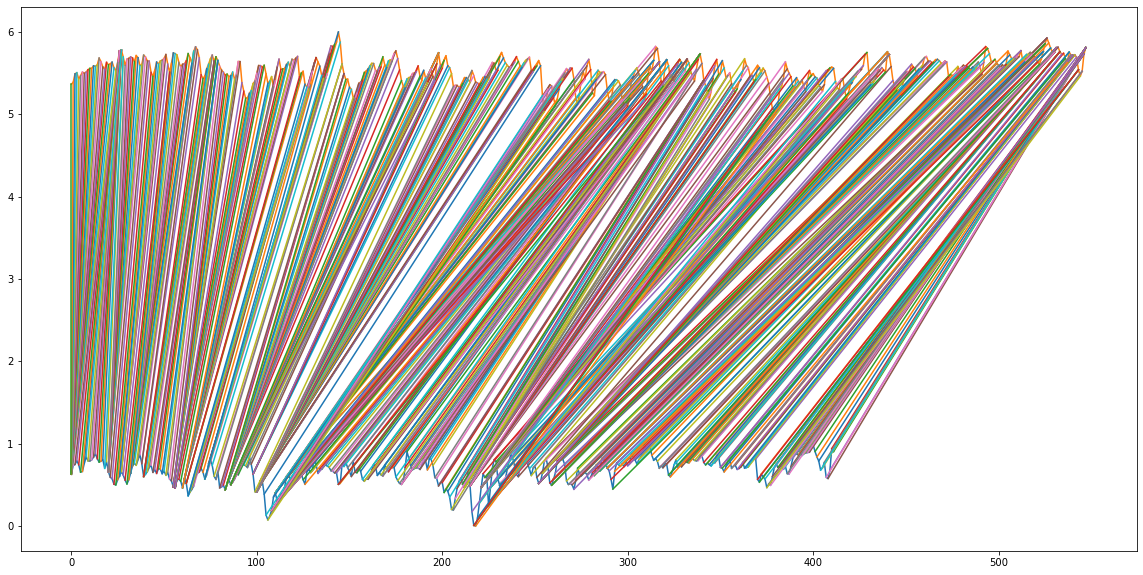

In [10]:
source = './data/Audio/4th_video.wav'
target = './data/Audio/user_video.wav'
export_dir = './data/Audio/'
mfcc_score, x_sys, y_sys, x_user, y_user = Wave.MFCC(source, target, export_dir)

In [11]:
mfcc_score

54.23117338579435

In [12]:
api_system = './data/Audio/api_system_audio.wav'
api_user = './data/Audio/api_user_audio.wav'

In [13]:
t_score, sys_text, user_text = Pronounce.text_recognition(api_system, api_user)
t_score, sys_text, user_text

(88.5,
 '근데 마장동에서 곱창 먹고 집에 갈 때 택시비 빌려 간 거 1만4800원은한 번에 또',
 '그런데 마장동에서 5장 걷고 집에 갈 때 빌려간 거 택시비 1만4800원 안 보냈던데')

In [14]:
audioFilePath = './data/Audio/pronoun.wav'

In [15]:
p_score = Pronounce.prounce_score(audioFilePath, sys_text)
p_score

original wav sr: 22050, original wav shape: (184555,), resample wav sr: 16000, resmaple shape: (133918,)


0

#### Visualize

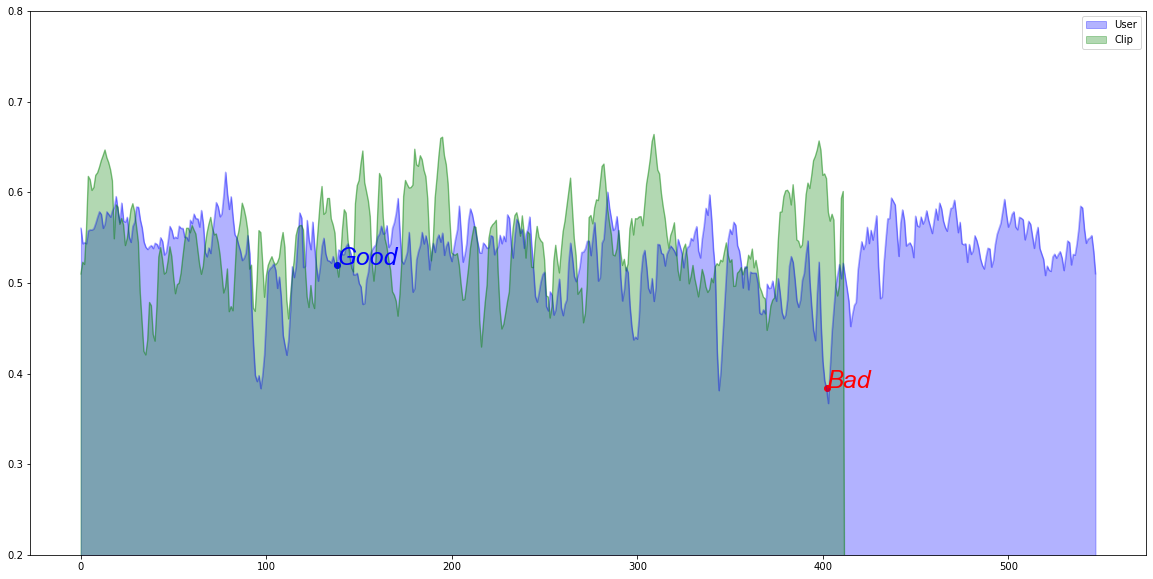

In [16]:
visualize.mfcc_visualize(x_sys, y_sys, x_user, y_user)

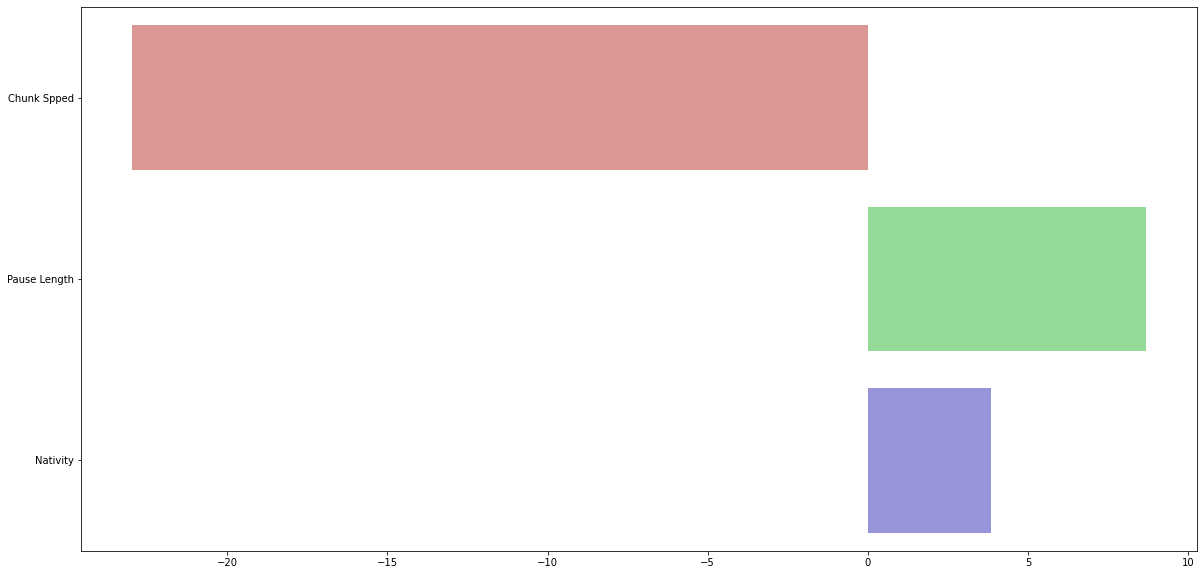

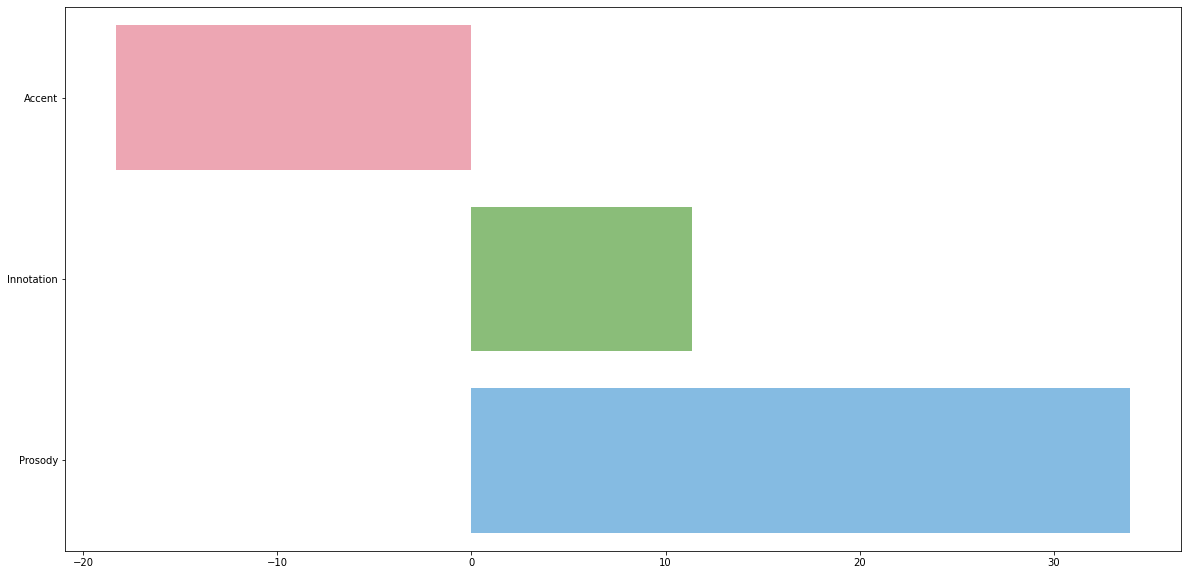

In [17]:
visualize.pronunciation_visualize(p_score)

In [18]:
visualize.text_recognition_visualize(sys_text, user_text)

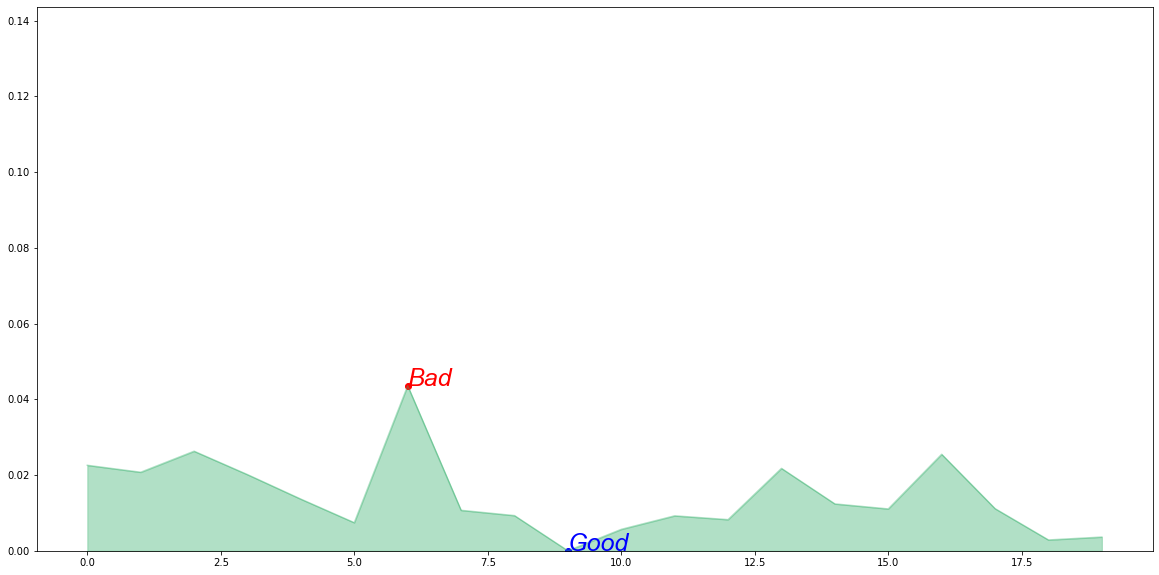

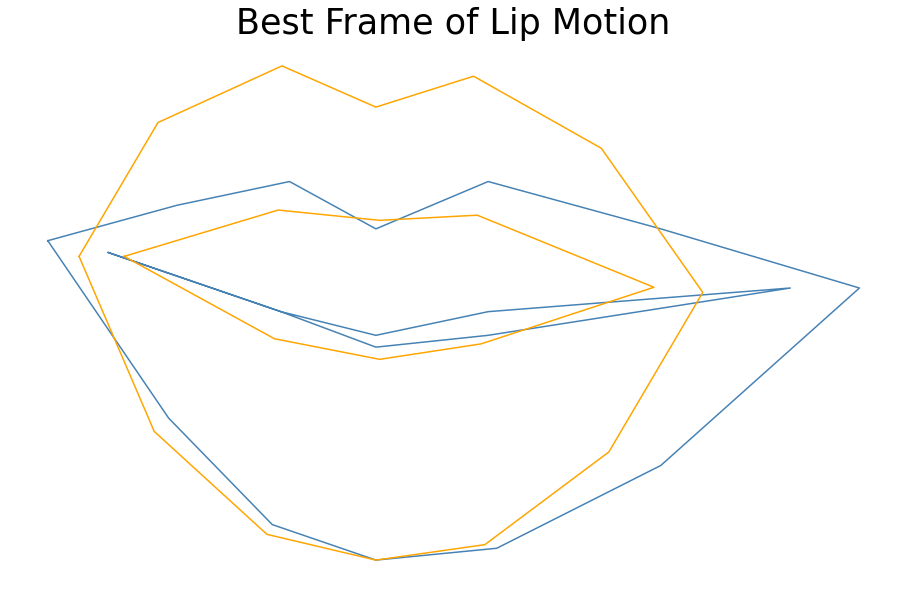

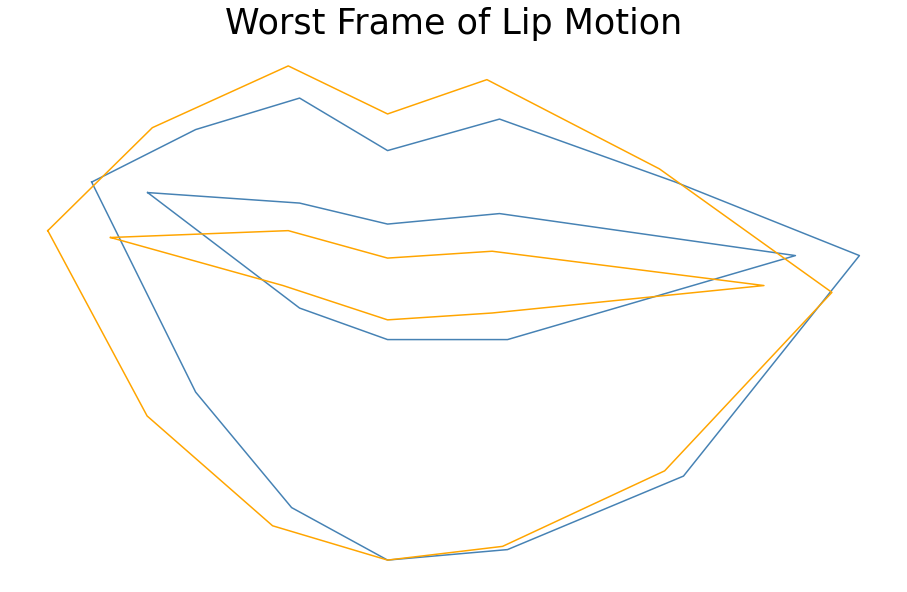

In [19]:
visualize.lip_visualize(4, l_lst)

In [20]:
visualize.radar_visualize(p_score, t_score, mfcc_score, l_score)

In [22]:
from utils import recommendar

data = pd.read_csv('./data/database.csv')
sent_token = ['Rage']
act_token = ['kissing']

video_names = recommendar.video_rec(sent_token, act_token, data)
ds_lst = recommendar.video_infos(video_names)
print(video_names, ds_lst)

['KETI_MULTIMODAL_0000000396', 'KETI_MULTIMODAL_0000000401', 'KETI_MULTIMODAL_0000000408', 'KETI_MULTIMODAL_0000000416'] ['김선영이 건너편 집에서 우산을 쓰고 나온다.', '스잘, 이수민, 라미란, 조덕제가 다같이 밥을 먹는다.', '이점이가 해준 음식을 백수지가 먹는다', '라미란이 정환의 방에 들어와 침대에 앉으며 정환에게 묻는다.']


In [13]:
import numpy as np
def reg_score(p_score, t_score, mfcc_score, l_score):
    sc_list = [p_score, t_score, mfcc_score, l_score]
    sc_list = np.array(sc_list)
    sc_mean = np.mean(sc_list)
    sc_std = np.std(sc_list)
    total_score = []
    for sc in sc_list:
        if abs(float(sc)-sc_mean) >= sc_std :
            total_score.append(sc_mean)
        else :
            total_score.append(sc)
    reg = np.mean(np.array(total_score))
    return reg

In [22]:
file_path = './data/'
video_name = 'system_video'
target_name = 'user_video'
video_index = 0
video_num = 4
target_dir = './data/test'
source_audio = f'./data/Audio/{video_num}th_video.wav'
target_audio = './data/Audio/user_video.wav'
export_dir = './data/Audio/'
api_sys = './data/Audio/api_system_audio.wav'
api_user = './data/Audio/api_user_audio.wav'
pro_path = './data/Audio/pronoun.wav'

def total_infer(video_name, file_path, target_name, target_dir, video_index, source_audio, target_audio, video_num,export_dir, api_sys, api_user, pro_path, sys_text=None, selected_dir=None):
    lst, dialogue = contents_select.contents_select(filepath=file_path, video_name=video_name, exist=True)
    lets_study, lets_study_lip_lst = contents_select.create_study_dir(video_name, lst, dialogue=dialogue, object=None, exist=True)
    selected_dir = f'./data/Study_Dir/{lets_study[video_index]}th_Study_Dir'
    
    Lip_motion.make_target_dir(target_name, selected_dir)

    dir_lst = lets_study
    l_score, l_lst = Lip_motion.lip_motion_analysis(video_index, target_dir, dir_lst)
    
    Wave.make_wave_file(f'{video_num}th_video', f'./data/Study_Dir/{video_num}th_Study_Dir/')
    Wave.make_wave_file(videoname=target_name, directory=file_path) 

    mfcc_score, x_sys, y_sys, x_user, y_user = Wave.MFCC(source_audio, target_audio, export_dir)

    t_score, sys_text, user_text = Pronounce.text_recognition(api_sys, api_user)
    p_score = Pronounce.prounce_score(pro_path, sys_text)

    visualize.mfcc_visualize(x_sys, y_sys, x_user, y_user)
    visualize.pronunciation_visualize(p_score)
    visualize.text_recognition_visualize(sys_text, user_text)
    visualize.lip_visualize(video_num, l_lst)
    visualize.radar_visualize(p_score, t_score, mfcc_score, l_score)

    reg = reg_score(p_score, t_score, mfcc_score, l_score)

    return reg, p_score, t_score, mfcc_score, l_score

Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
0번째 영상 확인을 시작합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
4번째 영상 확인을 시작합니다.
4번 영상은 Let's study 학습 자료로 활용 가능합니다.
Directory is already existed
Directory is already existed
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful
6번째 영상 확인을 시작합니다.
6번 영상은 Let's study 학습 자료로 활용 가능합니다.
영상 확인 완료: [4, 6] 학습 가능
Directory is already existed
Directory is already existed
Frames are already existed
원본 영상과 학습자 영상의 프레임 수가 일치합니다.
입술 분석 결과: 14.212619335881115
Directory is already existed
Directory is already existed
exporting ./data/Audio/out_audio_system.wav
exporting ./data/Audio/out_audio_user.wav


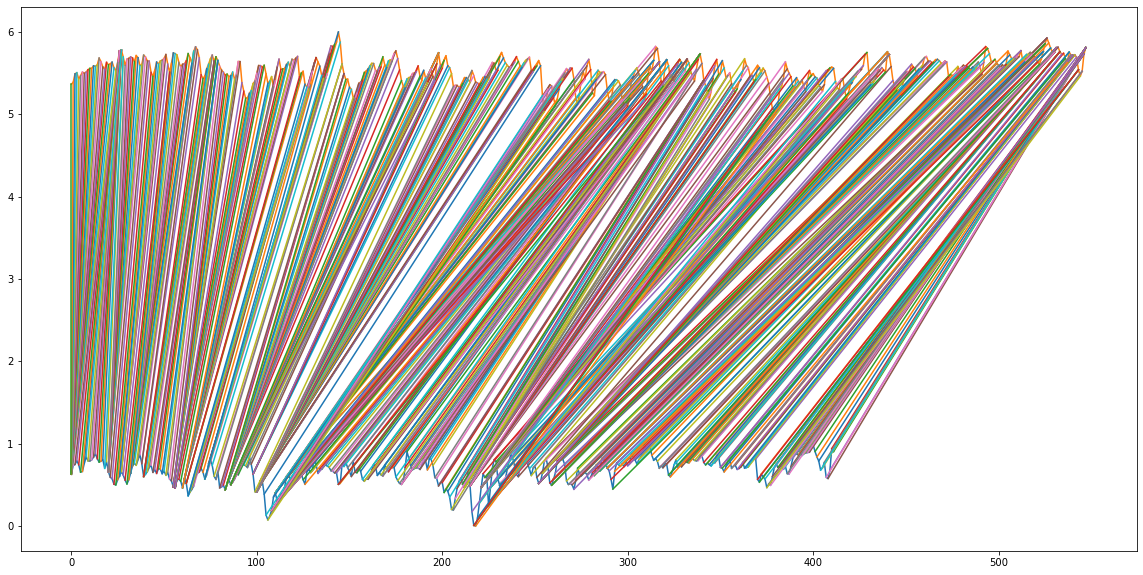

original wav sr: 22050, original wav shape: (184555,), resample wav sr: 16000, resmaple shape: (133918,)


(36.7289222706283, 0, 88.5, 54.23117338579435, 14.212619335881115)

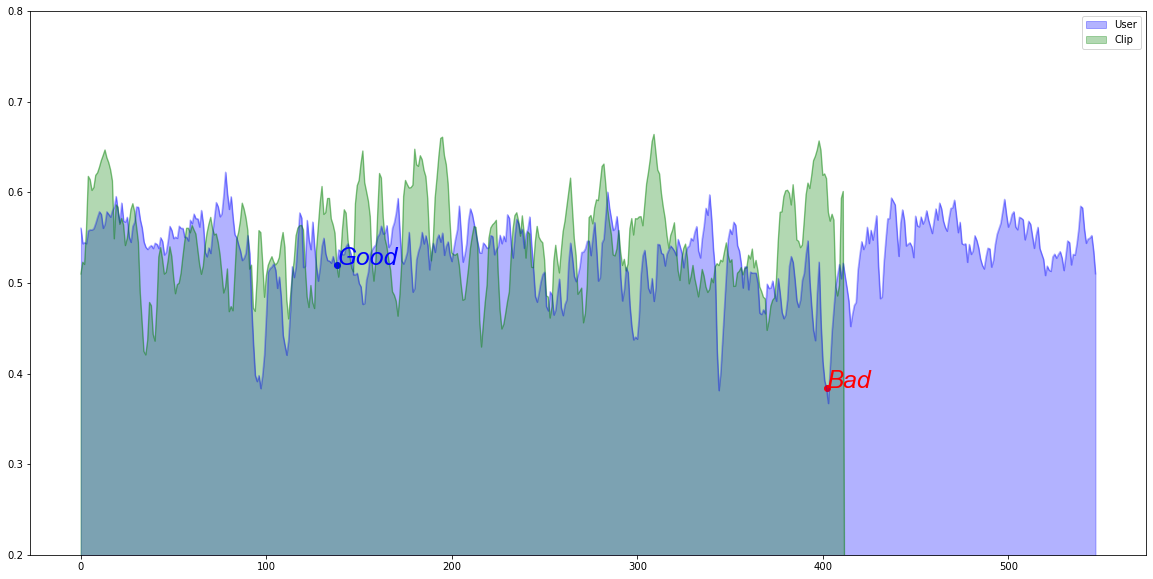

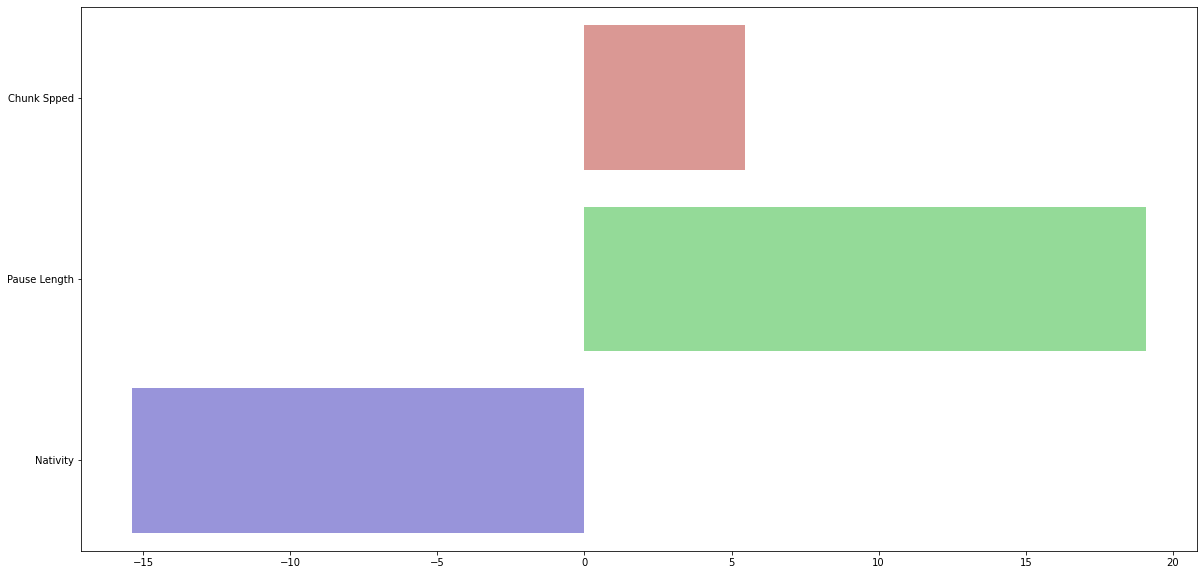

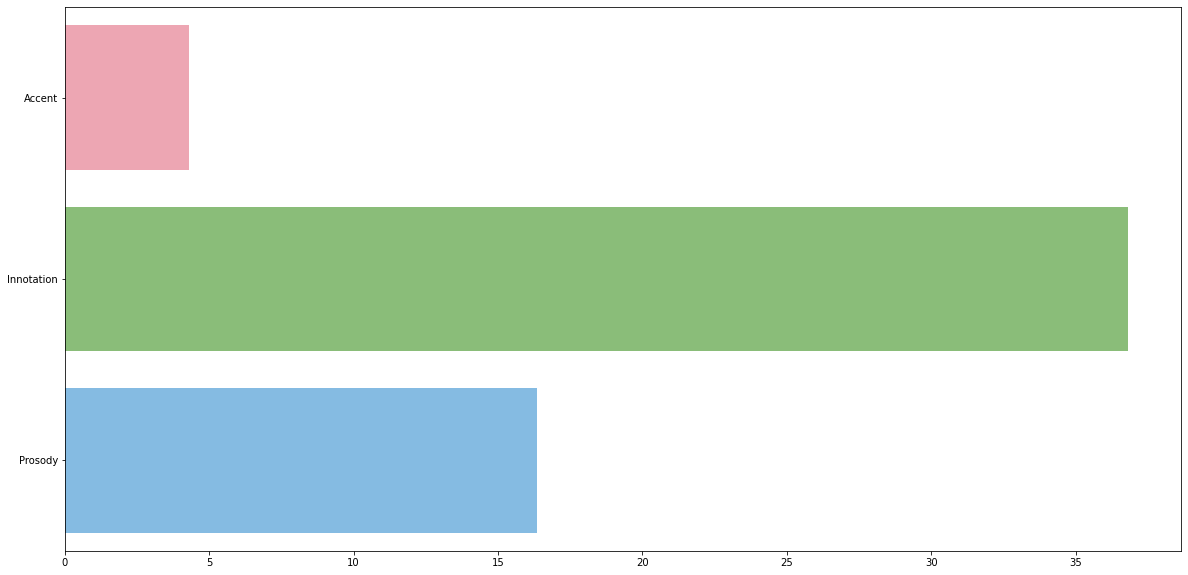

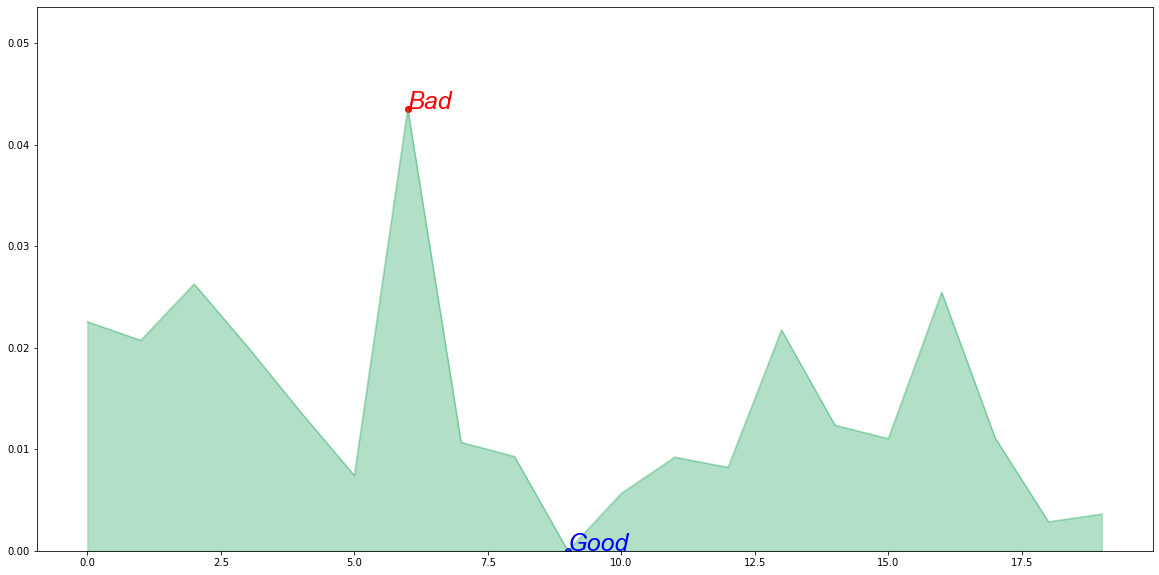

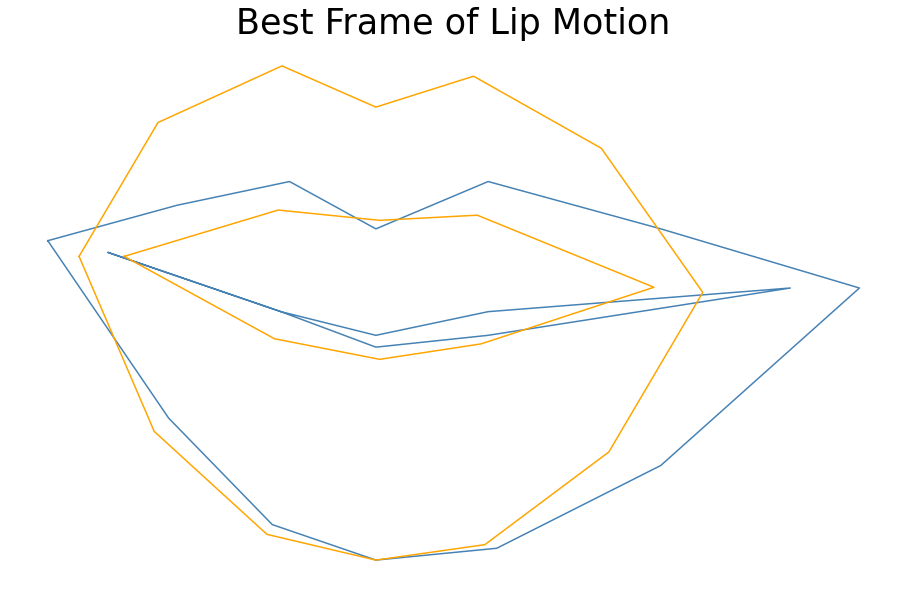

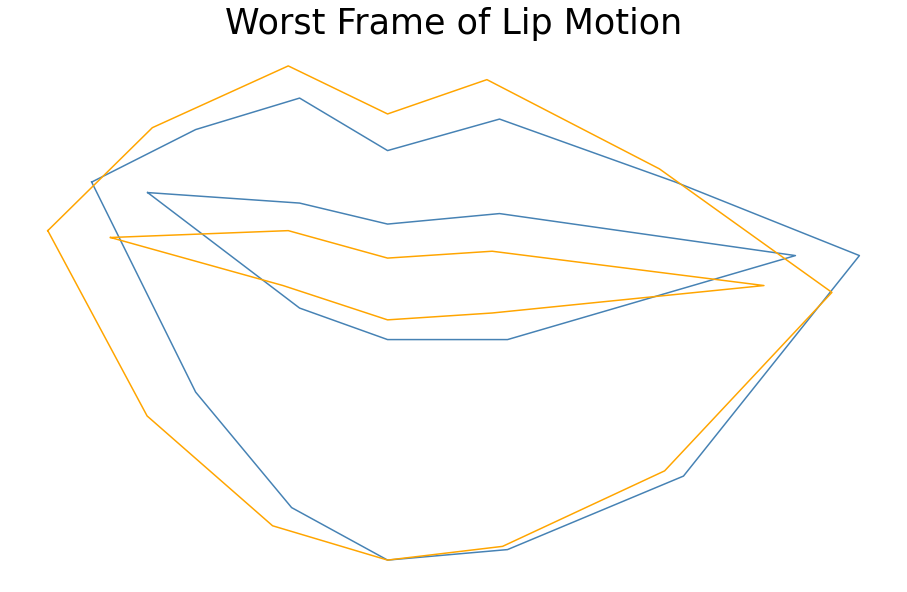

In [23]:
total_infer(video_name, file_path, target_name, target_dir, video_index, source_audio, target_audio, video_num, export_dir, api_sys, api_user, pro_path)

In [5]:
p_score = 10
t_score = 90
mfcc_score = 90
l_score = 90
reg_score(p_score, t_score, mfcc_score, l_score)

85.0

## Model inference

In [1]:
from utils import T5
import warnings
warnings.filterwarnings('ignore')

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using a model of type t5 to instantiate a model of type mt5. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFMT5ForConditionalGeneration: ['decoder.embed_tokens.weight', 'encoder.embed_tokens.weight']
- This IS expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMT5ForConditionalGeneration from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceCla

In [3]:
T5.sentence_generate('근데 마장동에서 곱창 먹고 집에 갈때 택시비 빌려간거 만사천팔백원은 안보냈던데?')

'너무 비싸다'

In [14]:
from utils import Timesformer
Timesformer.TimeSformer('./data/system_video.mp4')

load checkpoint from local path: C:\Users\lucky\DYKK\model\mmaction2\checkpoints\timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth


'answering questions'

In [1]:
!pip freeze

absl-py==1.2.0
addict==2.4.0
appdirs==1.4.4
astunparse==1.6.3
attrs==22.1.0
audioread==2.1.9
av==9.2.0
awscli==1.25.39
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
boto3==1.24.39
botocore==1.27.39
brotlipy==0.7.0
cachetools==5.2.0
certifi==2022.6.15
cffi @ file:///C:/ci_310/cffi_1642682485096/work
chardet==3.0.4
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
chumpy==0.70
click==8.1.3
colorama==0.4.4
commonmark==0.9.1
cryptography @ file:///C:/ci/cryptography_1652101770956/work
cycler==0.11.0
Cython==0.29.31
debugpy @ file:///C:/ci/debugpy_1637091911212/work
decorator==4.4.2
decord==0.6.0
docutils==0.16
e==1.4.5
einops==0.4.1
entrypoints @ file:///C:/ci/entrypoints_1649926659561/work
fastjsonschema==2.16.1
ffmpeg-python==0.2.0
filelock==3.7.1
Flask==2.1.3
flatbuffers==1.12
future==0.18.2
gast==0.4.0
gluonnlp==0.10.0
google-auth==2.9.1
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
graphviz==0.8.4
grpcio==1.47.0
h5py==3.7.0
hug

In [1]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import pandas as pd
import numpy as np

class BERTDataset(Dataset):
      def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                  pad, pair):
          transform = nlp.data.BERTSentenceTransform(
              bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair) 

          self.sentences = [transform([i[sent_idx]]) for i in dataset]
          self.labels = [np.int32(i[label_idx]) for i in dataset]

      def __getitem__(self, i):
          return (self.sentences[i] + (self.labels[i], ))

      def __len__(self):
          return (len(self.labels))

class BERTClassifier(nn.Module):
    def __init__(self,
                bert,
                hidden_size = 768,
                num_classes = 6, # softmax 사용 <- binary일 경우는 2
                dr_rate=None,
                params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from utils import koBERT
koBERT.kobert_sent('근데 마장동에서 곱창 먹고 집에 갈때 택시비 빌려간거 만사천팔백원은 안보냈던데?')

using cached model. c:\Users\lucky\DYKK\.cache\kobert_news_wiki_ko_cased-1087f8699e.spiece


('분노', 'Rage', '분노', 'Rage')